In [53]:
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import imageio
from sklearn.cluster import SpectralClustering

In [4]:
img = imageio.imread("/Users/cereniyim/Desktop/IML_sample.jpg")

In [6]:
img.shape

(600, 600, 3)

In [15]:
img

Array([[[197, 125, 149],
        [196, 128, 151],
        [195, 132, 153],
        ...,
        [211, 169, 183],
        [212, 170, 182],
        [214, 172, 182]],

       [[199, 125, 148],
        [200, 131, 152],
        [199, 136, 155],
        ...,
        [211, 169, 181],
        [215, 173, 185],
        [218, 176, 186]],

       [[200, 125, 146],
        [204, 132, 152],
        [205, 141, 158],
        ...,
        [213, 169, 182],
        [219, 175, 188],
        [223, 180, 190]],

       ...,

       [[177, 145, 186],
        [172, 140, 181],
        [164, 129, 171],
        ...,
        [220, 178, 198],
        [219, 177, 199],
        [218, 176, 200]],

       [[163, 124, 169],
        [156, 117, 162],
        [148, 109, 154],
        ...,
        [217, 175, 195],
        [214, 175, 196],
        [213, 173, 197]],

       [[154, 111, 157],
        [147, 104, 149],
        [145,  99, 145],
        ...,
        [213, 174, 195],
        [211, 171, 195],
        [209, 171, 194]]

In [7]:
w, h, d = tuple(img.shape)

In [9]:
original_dimension = tuple(img.shape)

In [10]:
# boyutu 3'ten 2'ye düşürüyorum
# kare bir resmi sanki sanki ince uzun bir resimmiş gibi piksel piksel alt alta diziyorum aslında
image_array = np.reshape(img, (w*h, d))

In [11]:
image_array

Array([[197, 125, 149],
       [196, 128, 151],
       [195, 132, 153],
       ...,
       [213, 174, 195],
       [211, 171, 195],
       [209, 171, 194]], dtype=uint8)

In [33]:
model1 = KMeans(n_clusters = 100)

In [34]:
model1.fit(image_array)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=100, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
# my array of clusters
labels1 = model1.predict(image_array)

In [36]:
labels1.shape

(360000,)

In [37]:
# create image from predicted classes function
# inputs: cluster centroid a color for me, predicted labels, width and height
# cluster_center is 0 and 1 for the binary case
# I am assigning rgb color codes one by one to the image in the inner for loops
def create_image(cluster_center, labels, w, h):
    d = cluster_center.shape[1]
    # d değeri hep 3 olacak aslında
    image = np.zeros((w, h, d))
    label_indice = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = cluster_center[int(labels[int(label_indice)])]
            label_indice += 1
    return image

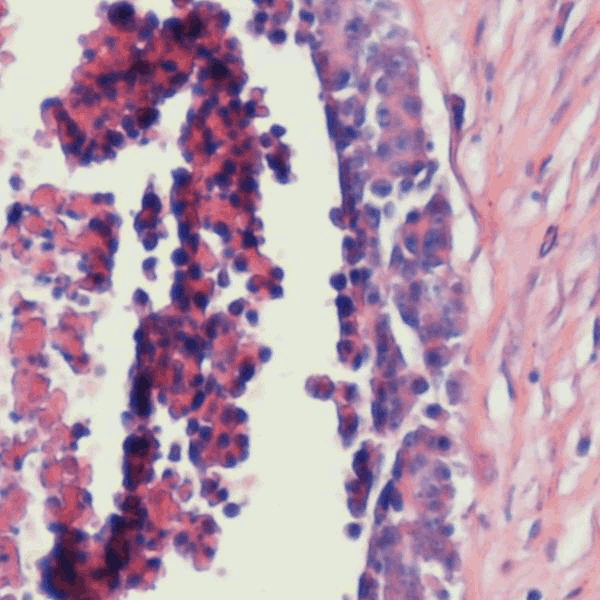

In [38]:
# predicted image with binary clusters
Image.fromarray(create_image(model1.cluster_centers_,
                             labels1, w, h).astype('uint8'))

In [39]:
model1.cluster_centers_

array([[ 75.44172737,  71.64984391, 143.23361082],
       [212.95688092, 184.7461213 , 192.6562563 ],
       [229.29751325, 233.19939738, 218.94626035],
       [154.0326087 , 103.22972973, 146.19036428],
       [ 61.5597148 ,  39.41666667,  96.58377897],
       [192.02892562, 131.87809917, 162.15436836],
       [108.97369594,  50.13865359,  93.8002675 ],
       [223.8761265 , 196.85023759, 207.0958545 ],
       [123.02508517,  90.60359244, 141.81820997],
       [157.24716267, 147.08764187, 172.75031526],
       [163.93834718,  77.16484477, 115.50065588],
       [180.99404097, 166.91769088, 186.3273743 ],
       [206.49619215, 109.66373755, 135.61628588],
       [186.84143605, 149.66903515, 170.33246073],
       [ 41.99272005,  32.1780278 ,  90.84778293],
       [108.94557557,  57.89350039, 108.42952232],
       [127.22518321, 124.5649567 , 171.46502332],
       [196.10286062, 197.06147292, 214.5143031 ],
       [161.16966443, 127.2504698 , 168.89744966],
       [223.17748609, 189.59808

Hierarchial Grouping

Önce K-means kullanarak imageda kaç farklı center var onu buldum ve datayı o centera indirdim gibi

In [40]:
from sklearn.cluster import AgglomerativeClustering

In [43]:
model2 = KMeans(n_clusters = 50, random_state = 3)
model2.fit(image_array)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=50, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=3, tol=0.0001, verbose=0)

In [44]:
k_means_center = model2.cluster_centers_

In [45]:
k_means_center

array([[112.64849188,  84.23516738, 139.08650978],
       [206.27043491, 199.36974076, 208.24706049],
       [229.33440218, 232.75476764, 219.76922015],
       [200.45412565, 153.61830113, 176.87519747],
       [105.0749308 ,  54.31395809, 104.13048636],
       [170.5441989 , 113.46339779, 152.20493785],
       [ 53.89744379,  47.31413613, 115.89220819],
       [143.92864031,  70.37970106, 112.61885246],
       [190.89190727, 165.81496231, 188.07381596],
       [196.31418643, 119.82910875, 151.36345053],
       [140.51325455, 133.66783775, 175.02203769],
       [ 51.63306353,  34.6764778 ,  91.36816286],
       [ 81.16518122,  42.20558526,  93.34759358],
       [110.13078892, 100.36979288, 156.29834768],
       [222.25619707, 199.20146266, 205.15973826],
       [219.98360058, 162.02040816, 174.0223518 ],
       [163.86727749,  82.32670157, 121.89581152],
       [147.19374718, 106.56966782, 152.2699534 ],
       [175.4257648 , 129.49087847, 164.60805501],
       [222.85621289, 211.54131

In [47]:
model2_predictions = model2.predict(image_array)

In [49]:
k_means_hiearachy = AgglomerativeClustering(n_clusters=2, linkage='single')
k_means_hiearachy.fit_predict(k_means_center)
# labels_iearachy = k_means_hiearachy.predict(k_means_center)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

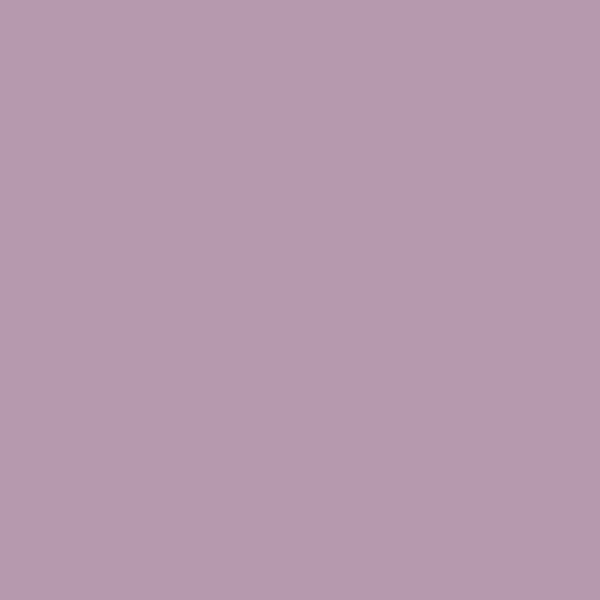

In [51]:
actual_labels = np.zeros((w*h))
for j in range(2):
    k_means_based = np.where(k_means_hiearachy ==j)[0]
    for k in range(len(k_means_based)):
        actual_labels[np.where(model2_predictions = k_means_based[k])] = j

centers = np.zeros((2,3))
for i in range(2):
    centers[i,:] = np.mean(image_array[np.where(actual_labels == i)], 
                           axis=0)
    
Image.fromarray(create_image(centers, actual_labels, w, h)
                .astype('uint8'))

Spectral Grouping:
- 360.000 satırlık bir şeyi direkt olarak gruplamaya başlayamaıyorum. O nedenle öncelikle k_ortalamaları kullanıyorum.

In [ ]:
spectral_cluster_number = 5
spectral = SpectralClustering(spectral_cluster_number, 
                              assign_labels = 'discretize', 
                              random_state = 3)
spectral.fit(k_means_center)
spectral_predictions = spektral.labels_
actual_labels_s = np.zeros((w*h))
